[^ gor: Uvod](00_uvod.ipynb)

# Ploščina lika
**Ploščino lika** med grafoma funkcij $f(x)$ in $g(x)$ na intervalu $[a,b]$ lahko izračunamo s preprosto formulo
$$P = \int_a^b\left|f(x)-g(x)\right | dx.$$
Za bolj komplicirane like, lahko formulo na različnih intervalih kombiniramo.


## Primer
Izračunaj skupno ploščino likov, ki jih omejujeta krivulji $y=x^2-x-2$ in $y=x^3-x^2+1$.  

### Rešitev
Najprej si narišemo graf, da si bomo vse skupaj lažje predstavljali

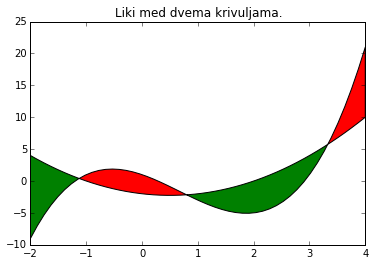

In [77]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
f = lambda x: x**2-x-2
g = lambda x: x**3-2*x**2-3*x+1
fig, ax = plt.subplots()
x = np.linspace(-2,4)
ax.fill_between(x, f(x),g(x),where = f(x)>=g(x), facecolor='green',interpolate=True)
ax.fill_between(x, f(x), g(x), where = f(x)<= g(x),facecolor='red',interpolate=True)
plt.title("Liki med dvema krivuljama.")


Krivulji omejujeta dva lika. Meje za integracijo izračunamo tako, da poiščemo presečišča. 

In [65]:
import sympy as sym
sym.init_printing()
x = sym.Symbol('x')
enacba = sym.Eq(f(x),g(x))
enacba

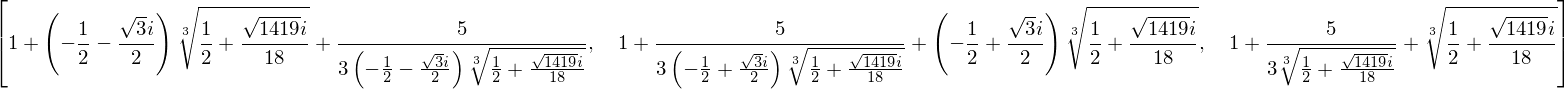

In [66]:
sym.solve(enacba,x)

Formule za presečišča so precej grda, zato bomo raje uporabili kar približke s števili s plavajočo vejico (float).

In [74]:
resitve = [x.evalf() for x in sym.solve(enacba,x)]
resitve

Opazimo, da so rešitve kompleksne. Čudno! Ampak imaginarni del je zelo majhen. Očitno gre za zaokrožitveno napako, saj je na grafu lepo vindo, da so rešitve realne. Vzamemo le realni del.

In [75]:
resitve = [sym.re(x) for x in resitve]
resitve.sort()
resitve

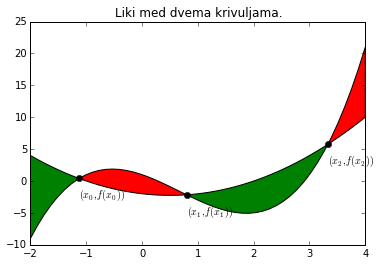

In [78]:
for i in range(len(resitve)):
    xi = resitve[i]
    ax.plot(xi,f(xi),'ko')
    ax.annotate('$(x_%d,f(x_%d))$'%(i,i),xy = (xi,f(xi)),xytext=(xi,f(xi)-3))
fig

## Ploščina

Če uporabimo formulo za ploščino, dobimo integral z absolutno vrednostjo, ki ga razdelimo na dva dela
$$\int_{x_0}^{x_2}\left|f(x)-g(x)\right|dx = \int_{x_0}^{x_1}\left(g(x)-f(x)\right)dx+\int_{x_1}^{x_2}\left(f(x)-g(x)\right)dx$$

In [87]:
x = sym.Symbol('x')
P = sym.integrate(g(x)-f(x),(x,resitve[0],resitve[1])) + sym.integrate(f(x)-g(x),(x,resitve[1],resitve[2]))
print("Skupna ploščina obeh likov je približno enaka %f" % P)

Skupna ploščina obeh likov je približno enaka 12.801220


[<< nazaj: odvod - ekstremi](04c_ekstremi.ipynb) [naprej: integral>>](05a_integral.pynb)

In [55]:
import disqus
%reload_ext disqus
%disqus matpy